# Demonstration of Gaussian Processes

In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16.0, 6.0)
matplotlib.rcParams['font.size'] = 16

import pymuqModeling as mm
import pymuqApproximation as ma

import matplotlib.pyplot as plt
import numpy as np

## One Spatial Dimension

In [2]:
xDim = 1
yDim = 1

numPts = 300
x = np.zeros((1,numPts))
x[0,:] = np.linspace(0,1,numPts)

mean = ma.ZeroMean(xDim,yDim)

# How many samples to plot for each kernel
numSamps = 3

In [3]:
def PlotSamples(gp):
    for i in range(numSamps):
        plt.plot(x[0,:], gp.Sample(x)[0,:])
        
    plt.xlabel('Position $x$')
    plt.ylabel('Field Value $y$')
    plt.show()

### Squared Exponential Kernel
$$
k(x,x^\prime) = \sigma^2 \exp\left[ -\frac{1}{2} \frac{\|x-x^\prime\|^2}{L^2}\right]
$$

In [4]:
var = 1.0 # Marginal Variance
length = 0.2 # Lengthscale of the kernel

kern = ma.SquaredExpKernel(xDim, var, length)

gp = ma.GaussianProcess(mean, kern)

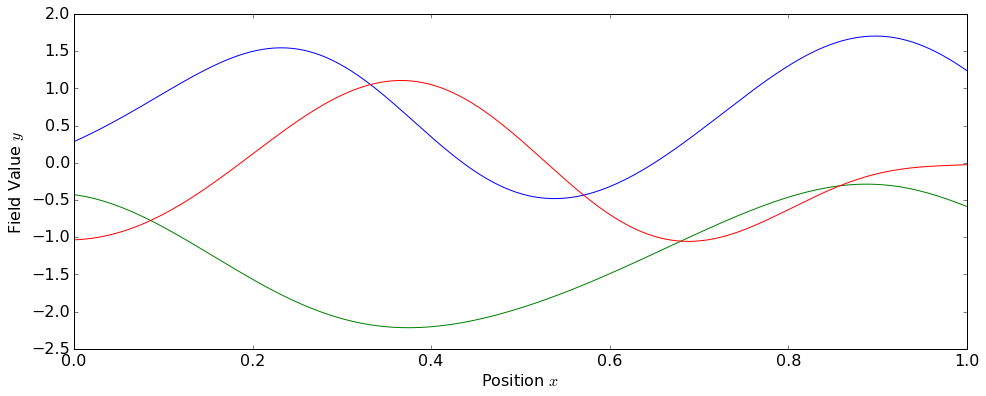

In [5]:
PlotSamples(gp)

### Matern Kernel
$$
k(x,x^\prime) = \sigma^2 \frac{2^{1-\nu}}{\Gamma(\nu)}\left(\sqrt{2\nu}\frac{\|x-x^\prime\|}{L}\right)^{\nu} K_\nu\left(\sqrt{2\nu}\frac{\|x-x^\prime\|}{L}\right)
$$

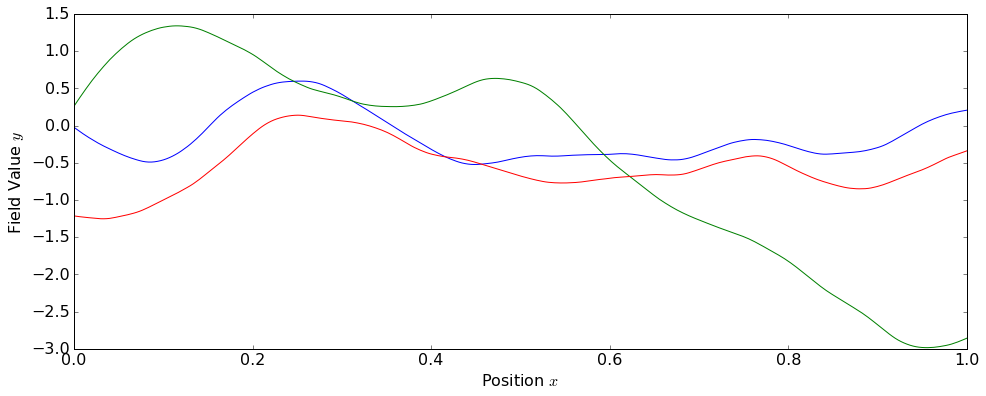

In [6]:
var = 1.0    # Marginal Variance
length = 0.2 # Lengthscale of the kernel
nu = 5.0/2.0 # Smoothness parameter

kern = ma.MaternKernel(xDim, var, length, nu)

gp = ma.GaussianProcess(mean, kern)

PlotSamples(gp)

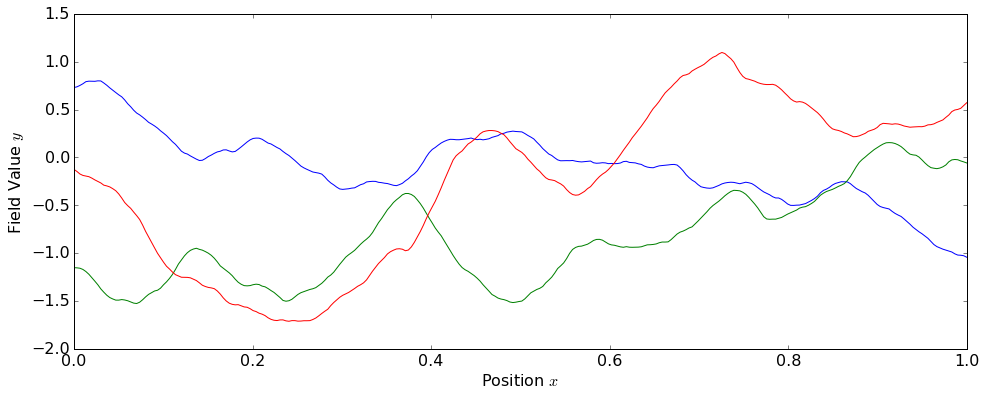

In [7]:
nu = 3.0/2.0 # Smoothness parameter

kern = ma.MaternKernel(xDim, var, length, nu)

gp = ma.GaussianProcess(mean, kern)

PlotSamples(gp)

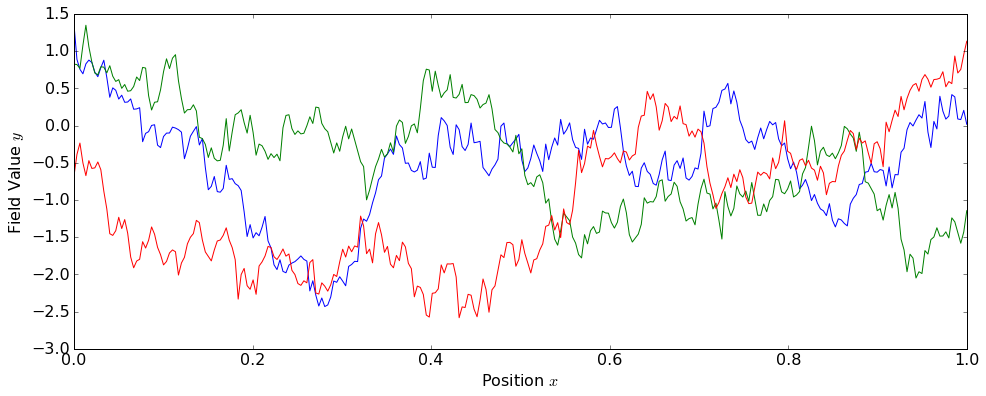

In [8]:
nu = 1.0/2.0 # Smoothness parameter

kern = ma.MaternKernel(xDim, var, length, nu)

gp = ma.GaussianProcess(mean, kern)

PlotSamples(gp)

### Periodic Kernel
$$
k(x,x^\prime) = \sigma^2 \exp\left[ -\frac{2}{L^2} \sin^2\left(\frac{\pi}{P}\|x-x^\prime\|\right) \right];
$$

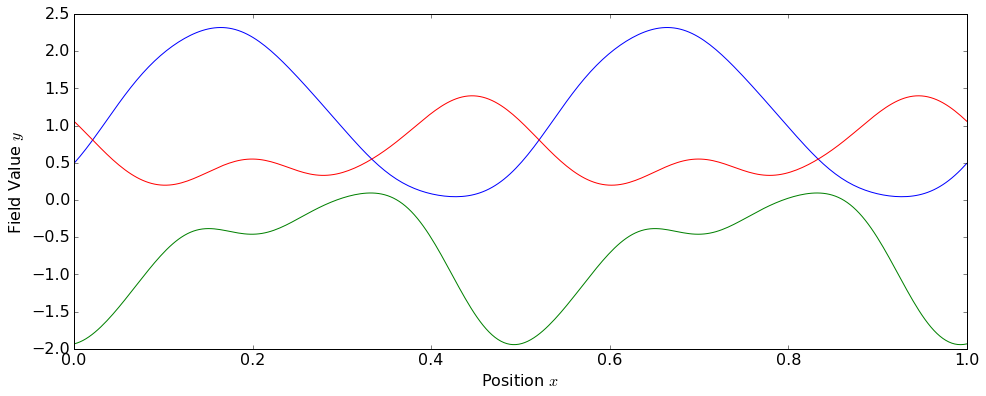

In [9]:
var = 1.0    # Marginal Variance
length = 1.5 # Lengthscale of the kernel
period = 0.5 # Period

kern = ma.PeriodicKernel(xDim, var, length, period)

gp = ma.GaussianProcess(mean, kern)

PlotSamples(gp)

### Constant Kernel
$$
k(x,x^\prime) = \sigma^2
$$

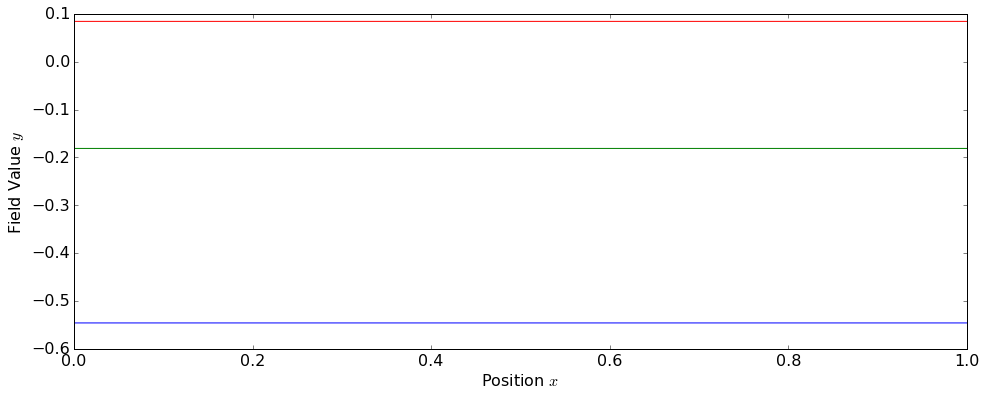

In [10]:
var = 1.0

kern = ma.ConstantKernel(xDim, var)

gp = ma.GaussianProcess(mean, kern)

PlotSamples(gp)

### Quasi-Periodic Kernels

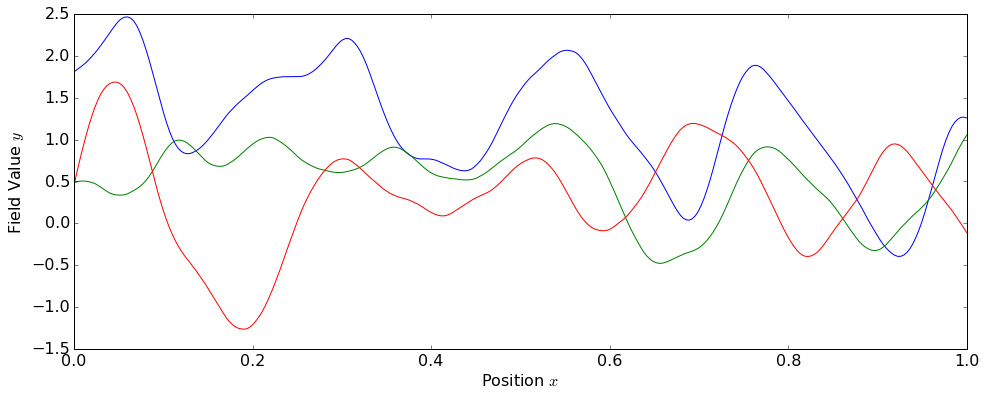

In [11]:
perVar = 1.0     # Marginal Variance
perLength = 1.5  # Lengthscale of the kernel
perPeriod = 0.25 # Period

matVar = 1.0     # Matern Variance
matLength = 0.5  # Matern Length
matNu = 3.0/2.0  # Matern Smoothness

kern1 = ma.MaternKernel(xDim, matVar, matLength, matNu)
kern2 = ma.PeriodicKernel(xDim, perVar, perLength, perPeriod)
kern = kern1*kern2

gp = ma.GaussianProcess(mean, kern)

PlotSamples(gp)

### Sum Kernels


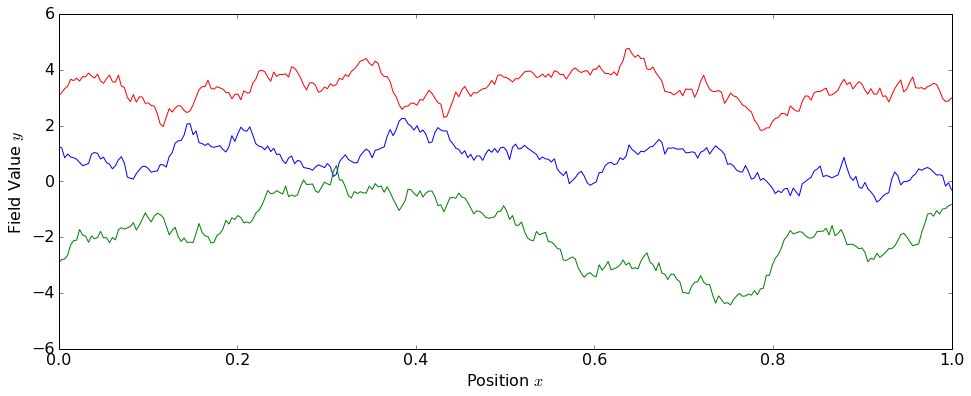

In [12]:
constVar = 50.0

matVar = 1.0
matLength = 0.2
matNu = 1.0/2.0

kern1 = ma.MaternKernel(xDim, matVar, matLength, matNu)
kern2 = ma.ConstantKernel(xDim, constVar)
kern = kern1 + kern2

gp = ma.GaussianProcess(mean, kern)

PlotSamples(gp)

## Two Spatial Dimensions

In [13]:
numPts = 40
xDim = 2
yDim = 1

# Construct the grid points
x1 = np.linspace(0,1,numPts)
x2 = np.linspace(0,1,numPts)
X1, X2 = np.meshgrid(x1,x2)
x = np.zeros((2,numPts*numPts))

x[0,:] = X1.ravel()
x[1,:] = X2.ravel()

mean = ma.ZeroMean(xDim,yDim)


numSamps = 3

In [14]:
def PlotSamples2d(gp):
    gauss = gp.Discretize(x)
    fig, axs = plt.subplots(nrows=1, ncols=numSamps)
    for i in range(numSamps):
        samp = gauss.Sample()
        axs[i].pcolor(X1, X2, np.reshape(samp, (numPts,numPts)))
        axs[i].set_title('Sample %d'%i)
        
    plt.show()

### Isotropic Matern

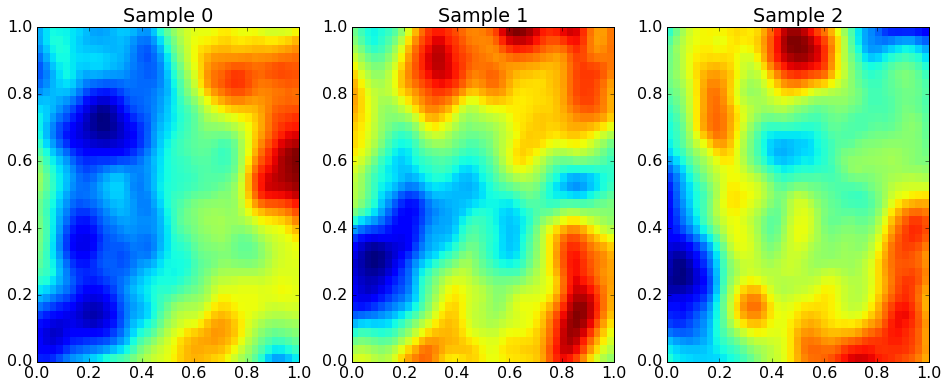

In [15]:
var = 1.0    # Marginal Variance
length = 0.2 # Lengthscale of the kernel
nu = 5.0/2.0 # Smoothness parameter

kern = ma.MaternKernel(xDim, var, length, nu)

gp = ma.GaussianProcess(mean, kern)

PlotSamples2d(gp)

### Anisotropic Matern

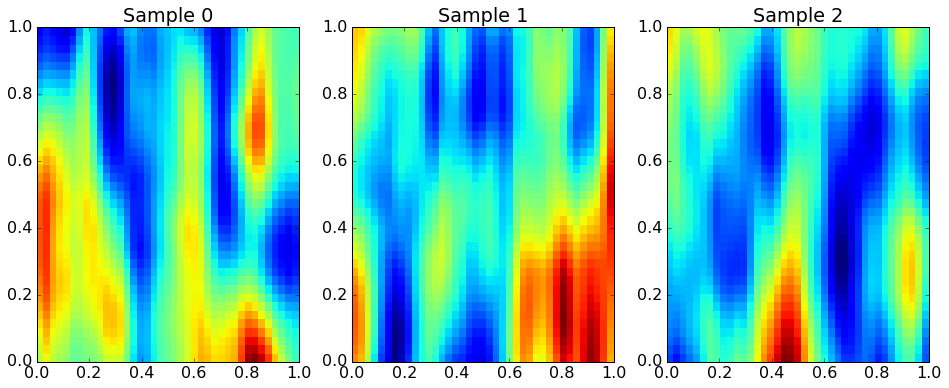

In [16]:
var = 1.0    # Marginal Variance
length1= 0.1 # Lengthscale of the kernel in the x_1 direction
length2= 0.4 # Lengthscale of the kernel in the x_1 direction

nu1 = 5.0/2.0 # Smoothness in x1
nu2 = 5.0/2.0 # Smoothness in x2

kern1 = ma.MaternKernel(xDim, [0], var, length1, nu1)
kern2 = ma.MaternKernel(xDim, [1], var, length2, nu2)
kern = kern1*kern2

gp = ma.GaussianProcess(mean, kern)

PlotSamples2d(gp)

### Periodic in X1, Squared Exp. in X2

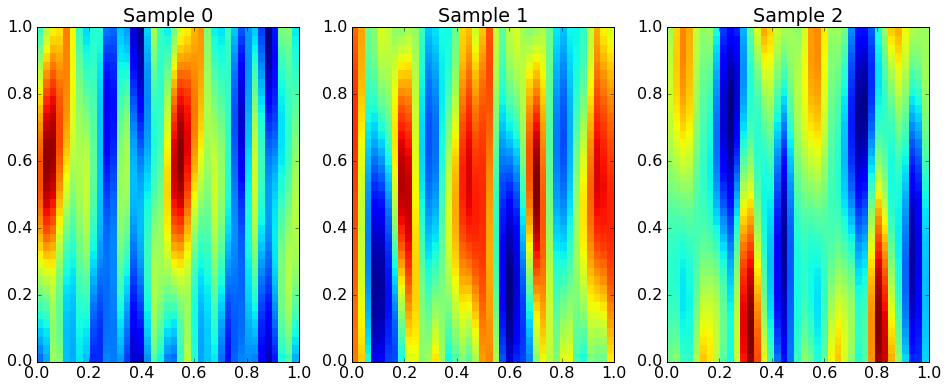

In [17]:
var = 1.0    # Marginal Variance
length1= 0.5 # Lengthscale of the kernel in the x_1 direction
length2= 0.4 # Lengthscale of the kernel in the x_1 direction
period1 = 0.5

kern1 = ma.PeriodicKernel(xDim, [0], var, length1, period1)
kern2 = ma.SquaredExpKernel(xDim, [1], var, length2)
kern = kern1*kern2

gp = ma.GaussianProcess(mean, kern)

PlotSamples2d(gp)